<a href="https://colab.research.google.com/github/daynoh/100-Days-Of-ML-Code/blob/master/Convolutional_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNNs are regularised versions of multi-layer perceptrons

In [1]:
!pip install tensorflow-gpu 

     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 450kB 47.5MB/s 
     |████████████████████████████████| 3.9MB 40.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=226c7b03ef212b0b892701276b4c95da7f5f060a0b7a807832257c19c1eaed2c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Fo

In [1]:
!pip install mlxtend


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D,MaxPool2D,Dropout


In [3]:
# checking tensorflow version
tf.__version__

'2.2.0-rc2'

In [0]:
# importing supporting libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [0]:
classes_name = ['airplane','automobile','bird', 'cat', 'deer', 'dog','frog','horse','ship','truck']

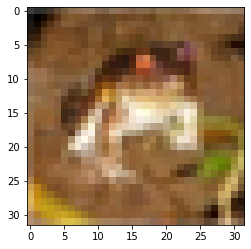

In [42]:
plt.imshow(X_train[0])

In [43]:
np.max(X_train)

255

In [0]:
X_train = X_train/255
X_test = X_test/255

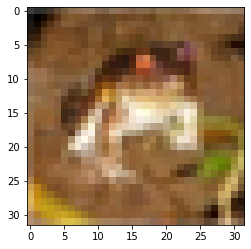

In [45]:
plt.imshow(X_train[0])

**Building a CNN model**


In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = [32, 32, 3]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))




model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['sparse_categorical_accuracy'])

In [49]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))


Epoch 1/10
5000/5000 [==============================] - 187s 37ms/step - loss: 1.4111 - sparse_categorical_accuracy: 0.4939 - val_loss: 1.1468 - val_sparse_categorical_accuracy: 0.5913
Epoch 2/10
5000/5000 [==============================] - 187s 37ms/step - loss: 1.1153 - sparse_categorical_accuracy: 0.6058 - val_loss: 1.0893 - val_sparse_categorical_accuracy: 0.6148
Epoch 3/10
5000/5000 [==============================] - 187s 37ms/step - loss: 0.9973 - sparse_categorical_accuracy: 0.6474 - val_loss: 0.9830 - val_sparse_categorical_accuracy: 0.6484
Epoch 4/10
5000/5000 [==============================] - 184s 37ms/step - loss: 0.9135 - sparse_categorical_accuracy: 0.6762 - val_loss: 1.0352 - val_sparse_categorical_accuracy: 0.6381
Epoch 5/10
5000/5000 [==============================] - 183s 37ms/step - loss: 0.8452 - sparse_categorical_accuracy: 0.7043 - val_loss: 0.9068 - val_sparse_categorical_accuracy: 0.6823
Epoch 6/10
5000/5000 [==============================] - 185s 37ms/step - lo

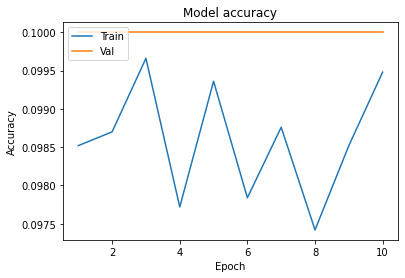

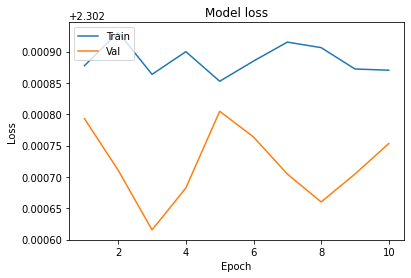

In [39]:
epoch_range = range(1, 11)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()